# Good Vibes: The Probability of Earthquake Magnitude and Death
*A Milestone Report for the Introduction to Data Science Project*  
  
**Team Fugacity Members**  
Paul Mundt, u0932146  
Katie Jones, u0541901  

## Data Collection and Cleaning

The main source of data for the regressions comes from the Earthquake Impact Database on earthquake-report.com. For the analysis, we are analyzing data from 2017-2020. The data from 2020 is partial, and includes information that was availible on Wednesday, March 18th. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import CSV Files Extracted from the Earthquake Impact Database
data_2017 = pd.read_csv("2017_raw.csv", encoding = "ISO-8859-1").dropna(axis = 0, how = "all")
data_2018 = pd.read_csv("2018_raw.csv", encoding = "ISO-8859-1").dropna(axis = 0, how = "all")
data_2019 = pd.read_csv("2019_raw.csv", encoding = "ISO-8859-1").dropna(axis = 0, how = "all")
data_2020 = pd.read_csv("2020_raw.csv", encoding = "ISO-8859-1").dropna(axis = 0, how = "all", thresh = 2)

In [3]:
#Clean 2020 Data
data_2020 = data_2020.drop('Depth (km)', axis = 1).drop('Intensity (MMI / JMA)', axis = 1).drop('Type', axis = 1).drop('Origin', axis = 1).drop('Tsunami height', axis = 1)
data_2020 = data_2020.fillna(value = 0)
data_2020 = data_2020.rename(columns = {"Epicenter" : "Country", "Region (Epicenter)" : "Region"} )

#Clean 2019 Data
data_2019 = data_2019.drop('Depth (km)', axis = 1).drop('Intensity (MMI / JMA)', axis = 1).drop('Type', axis = 1).drop('Origin', axis = 1).drop('Tsunami height', axis = 1)
data_2019 = data_2019.fillna(value = 0).replace("--", "0")
data_2019 = data_2019.rename(columns = {"Country (Epicenter)" : "Country", "Region (Epicenter)" : "Region"} )

#Clean 2018 Data
data_2018 = data_2018.drop('Depth (km)', axis = 1).drop('Intensity (MMI / JMA)', axis = 1).drop('Type', axis = 1).drop('Origin', axis = 1).drop('Tsunami height', axis = 1)
data_2018 = data_2018.fillna(value = 0).replace("--", "0")
latlong_2018 = [0 for _ in range(0, len(data_2018.index))]
data_2018.insert(loc = 4, column = 'Lat', value = latlong_2018)
data_2018.insert(loc = 5, column = 'Long', value = latlong_2018)
data_2018 = data_2018.rename(columns = {"Country (Epicenter)" : "Country", "Region (Epicenter)" : "Region"} )

#Clean 2017 Data
data_2017 = data_2017.drop('Depth (km)', axis = 1).drop('Intensity (MMI)', axis = 1).drop('Tsunami height', axis = 1)
data_2017 = data_2017.fillna(value = 0).replace("--", "0")
latlong_2017 = [0 for _ in range(0, len(data_2017.index))]
data_2017.insert(loc = 4, column = 'Lat', value = latlong_2017)
data_2017.insert(loc = 5, column = 'Long', value = latlong_2017)
data_2017 = data_2017.rename(columns = {"Impact coefficient (D)" : "Impact value (D)"} )

In [4]:
#Concatenate Dataframes into a Single Dataset
earthquake_data = pd.concat([data_2017, data_2018, data_2019, data_2020]).reindex()

In [6]:
earthquake_data

Date (UTC)   Country                 Region  Magnitude       Lat   Long  \
0    1/2/2017     Italy                 Umbria        4.1      0.00   0.00   
1    1/3/2017     India                Tripura        5.5      0.00   0.00   
2    1/3/2017    Brazil               Maranhao        4.6      0.00   0.00   
3    1/3/2017      Fiji  Western Division (OS)        7.2      0.00   0.00   
4    1/6/2017      Iran                   Fars        5.1      0.00   0.00   
..        ...       ...                    ...        ...       ...    ...   
76  3/13/2020     India                 Kerala        2.8      9.79  76.88   
77  3/13/2020  Tanzania                  Tanga        4.8     -4.90  38.55   
78  3/14/2020      Iran                    Qom        4.0     34.56  50.72   
79  3/15/2020      Iran              Hormozgan        5.4     27.20  55.32   
80  3/16/2020     India              Rajasthan        3.1  44100.00  75.30   

    Fatalities  Injuries  displaced  Impact value (D)  buildings damaged  \
0          0.0       0.0       30.0          0.194401                0.0   
1          3.0      49.0      600.0          1.668774             1456.0   
2          0.0       0.0        0.0          0.752967              500.0   
3          0.0       0.0        0.0          0.000000                0.0   
4          4.0       4.0      905.0          1.447852              400.0   
..         ...       ...        ...               ...                ...   
76         0.0       0.0        0.0          0.038254               10.0   
77         0.0       0.0        0.0          0.007925                2.0   
78         0.0       0.0        0.0          0.038254               10.0   
79         0.0       2.0        0.0          0.235972               20.0   
80         0.0       0.0        0.0          0.007925                2.0   

    buildings destroyed  
0                   0.0  
1                 166.0  
2                   0.0  
3                   0.0  
4                  40.0  
..                  ...  
76                  0.0  
77                  0.0  
78                  0.0  
79                  1.0  
80                  0.0  

[983 rows x 12 columns]

## Data Exploration

Exploring the data through graphs before applying an analysis.

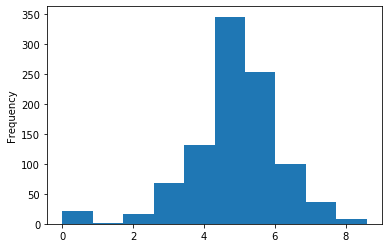

In [9]:
earthquake_data["Magnitude"].plot.hist()